#1. 데이터 불러오기


In [ ]:
!pip install xgboost

In [ ]:
!pip install pmdarima

   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 689.1/689.1 kB 6.9 MB/s eta 0:00:00


In [ ]:
import pandas as pd
import numpy as np
import warnings
warnings.filterwarnings('ignore')
df=pd.read_csv('/content/train.csv')
print(df.info())
print(df.head())
print(df.describe())

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10836 entries, 0 to 10835
Data columns (total 9 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   item_id   10836 non-null  object 
 1   year      10836 non-null  int64  
 2   month     10836 non-null  int64  
 3   seq       10836 non-null  float64
 4   type      10836 non-null  int64  
 5   hs4       10836 non-null  int64  
 6   weight    10836 non-null  float64
 7   quantity  10836 non-null  float64
 8   value     10836 non-null  float64
dtypes: float64(4), int64(4), object(1)
memory usage: 762.0+ KB
None
    item_id  year  month  seq  type   hs4    weight  quantity     value
0  DEWLVASR  2022      1  1.0     1  3038   14858.0       0.0   32688.0
1  ELQGMQWE  2022      1  1.0     1  2002   62195.0       0.0  110617.0
2  AHMDUILJ  2022      1  1.0     1  2102   18426.0       0.0   72766.0
3  XIPPENFQ  2022      1  1.0     1  2501   20426.0       0.0   11172.0
4  FTSVTTSR  2022      1  1.0     

In [ ]:
pd.set_option('display.max_rows', 100)

# 이전에 실행했던 코드를 다시 실행합니다.
print(df['hs4'].value_counts())

hs4
2805    646
3824    535
2811    516
8501    423
8505    387
8102    377
2807    354
3815    310
8714    258
2846    258
3102    257
2529    249
7207    196
2102    129
2002    129
8527    129
2501    129
3006    129
2916    129
3207    129
2836    129
2841    129
2833    129
5111    129
5205    129
3806    129
3904    129
3909    129
4202    129
4601    129
4802    129
5609    129
5602    129
5309    129
3206    129
3404    129
3307    129
2847    129
2825    129
5515    129
8708    129
9403    129
5705    129
6211    129
8479    129
6101    129
3215    127
5402    125
2814    125
1210    125
8105    115
3038    114
5512    114
8467    113
7907    108
8461    105
5119     96
6006     94
4408     72
7202     71
9022     64
2701     62
3813     59
4810     56
2710     20
4403     18
4302      9
7142      8
2612      6
3024      5
3003      2
Name: count, dtype: int64


In [ ]:
print(df['weight'].value_counts())
print(df['weight'].value_counts(normalize=True))

weight
0.0         935
1.0         167
2.0          65
3.0          56
4.0          46
           ... 
264321.0      1
273566.0      1
655.0         1
758.0         1
18426.0       1
Name: count, Length: 7438, dtype: int64
weight
0.0         0.086286
1.0         0.015412
2.0         0.005999
3.0         0.005168
4.0         0.004245
              ...   
264321.0    0.000092
273566.0    0.000092
655.0       0.000092
758.0       0.000092
18426.0     0.000092
Name: proportion, Length: 7438, dtype: float64


In [ ]:
print(df['quantity'].value_counts())
print(df['quantity'].value_counts(normalize=True))

quantity
0.0         8919
1.0           81
2.0           76
3.0           37
4.0           31
            ... 
1990.0         1
3688.0         1
569.0          1
4728.0         1
935163.0       1
Name: count, Length: 1226, dtype: int64
quantity
0.0         0.823090
1.0         0.007475
2.0         0.007014
3.0         0.003415
4.0         0.002861
              ...   
1990.0      0.000092
3688.0      0.000092
569.0       0.000092
4728.0      0.000092
935163.0    0.000092
Name: proportion, Length: 1226, dtype: float64


In [ ]:
print(df['value'].value_counts())
print(df['value'].value_counts(normalize=True))

value
0.0           636
25905.0        10
24.0            8
20.0            7
26.0            6
             ... 
21733.0         1
292457.0        1
32555914.0      1
2515979.0       1
1952.0          1
Name: count, Length: 9686, dtype: int64
value
0.0           0.058693
25905.0       0.000923
24.0          0.000738
20.0          0.000646
26.0          0.000554
                ...   
21733.0       0.000092
292457.0      0.000092
32555914.0    0.000092
2515979.0     0.000092
1952.0        0.000092
Name: proportion, Length: 9686, dtype: float64


In [ ]:
df2=df[df['weight']==0]
df2.info()

<class 'pandas.core.frame.DataFrame'>
Index: 935 entries, 6 to 10819
Data columns (total 9 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   item_id   935 non-null    object 
 1   year      935 non-null    int64  
 2   month     935 non-null    int64  
 3   seq       935 non-null    float64
 4   type      935 non-null    int64  
 5   hs4       935 non-null    int64  
 6   weight    935 non-null    float64
 7   quantity  935 non-null    float64
 8   value     935 non-null    float64
dtypes: float64(4), int64(4), object(1)
memory usage: 73.0+ KB


In [ ]:
print(df2['hs4'].value_counts())

hs4
2805    240
5119     83
3824     82
2807     50
8102     38
8105     37
3815     30
7207     30
3813     28
2701     26
5512     26
7907     25
8461     24
4408     23
6006     22
9022     22
7202     20
3038     18
8467     17
4810     17
2529     14
2710     12
8501      8
4403      7
4802      6
5402      4
2612      4
4302      4
1210      3
7142      3
3003      2
3909      2
3215      2
8527      1
5111      1
2811      1
3024      1
2825      1
4601      1
Name: count, dtype: int64


In [ ]:
df3=df[df['quantity']==0]
df3.info()

<class 'pandas.core.frame.DataFrame'>
Index: 8919 entries, 0 to 10835
Data columns (total 9 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   item_id   8919 non-null   object 
 1   year      8919 non-null   int64  
 2   month     8919 non-null   int64  
 3   seq       8919 non-null   float64
 4   type      8919 non-null   int64  
 5   hs4       8919 non-null   int64  
 6   weight    8919 non-null   float64
 7   quantity  8919 non-null   float64
 8   value     8919 non-null   float64
dtypes: float64(4), int64(4), object(1)
memory usage: 696.8+ KB


In [ ]:
print(df3['hs4'].value_counts())

hs4
2805    646
3824    535
2811    516
8505    387
8102    377
2807    354
3815    310
2846    258
3102    257
2529    249
7207    196
8708    129
2841    129
2916    129
2825    129
2836    129
2833    129
4802    129
3006    129
2847    129
3207    129
3404    129
3307    129
3806    129
3206    129
5602    129
3904    129
3909    129
4601    129
5205    129
2501    129
2002    129
2102    129
8714    129
8479    129
9403    129
5609    129
3215    127
1210    125
5402    125
2814    125
8105    115
3038    114
7907    108
5119     96
6006     94
4408     72
7202     71
2701     62
3813     59
4810     56
5512     24
8461     23
9022     22
8467     12
2710      9
7142      8
8501      8
4403      7
2612      6
3024      5
4302      3
3003      2
5111      1
8527      1
Name: count, dtype: int64


In [ ]:
df4=df[df['value']==0]
df4.info()

<class 'pandas.core.frame.DataFrame'>
Index: 636 entries, 82 to 10819
Data columns (total 9 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   item_id   636 non-null    object 
 1   year      636 non-null    int64  
 2   month     636 non-null    int64  
 3   seq       636 non-null    float64
 4   type      636 non-null    int64  
 5   hs4       636 non-null    int64  
 6   weight    636 non-null    float64
 7   quantity  636 non-null    float64
 8   value     636 non-null    float64
dtypes: float64(4), int64(4), object(1)
memory usage: 49.7+ KB


In [ ]:
print(df4['hs4'].value_counts())

hs4
2805    88
3824    81
8105    36
2807    32
7207    28
8102    26
3813    25
5512    25
8461    23
5119    23
4408    23
9022    22
3815    22
2701    21
6006    21
7202    20
3038    18
4810    17
2529    14
8467    12
7907     9
2710     9
8501     8
4403     7
5402     4
2612     3
1210     3
4302     3
7142     3
3215     2
3003     1
8527     1
4802     1
5111     1
2811     1
3024     1
4601     1
3909     1
Name: count, dtype: int64


In [ ]:
df5 = df[(df['weight'] == 0) & (df['quantity'] == 0) & (df['value'] == 0)]
df5.info()

<class 'pandas.core.frame.DataFrame'>
Index: 635 entries, 82 to 10819
Data columns (total 9 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   item_id   635 non-null    object 
 1   year      635 non-null    int64  
 2   month     635 non-null    int64  
 3   seq       635 non-null    float64
 4   type      635 non-null    int64  
 5   hs4       635 non-null    int64  
 6   weight    635 non-null    float64
 7   quantity  635 non-null    float64
 8   value     635 non-null    float64
dtypes: float64(4), int64(4), object(1)
memory usage: 49.6+ KB


In [ ]:
df6=df[(df['weight'] == 0) & (df['quantity'] == 0) & (df['value'] != 0)]

In [ ]:
df6.info()

<class 'pandas.core.frame.DataFrame'>
Index: 288 entries, 6 to 10758
Data columns (total 9 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   item_id   288 non-null    object 
 1   year      288 non-null    int64  
 2   month     288 non-null    int64  
 3   seq       288 non-null    float64
 4   type      288 non-null    int64  
 5   hs4       288 non-null    int64  
 6   weight    288 non-null    float64
 7   quantity  288 non-null    float64
 8   value     288 non-null    float64
dtypes: float64(4), int64(4), object(1)
memory usage: 22.5+ KB


In [ ]:
print(df6['hs4'].value_counts())

hs4
2805    152
5119     60
2807     18
7907     16
8102     12
3815      8
4802      5
2701      5
3813      3
7207      2
3003      1
8105      1
6006      1
2612      1
2825      1
3824      1
3909      1
Name: count, dtype: int64


In [ ]:
# 'year'와 'month'를 datetime 형식으로 변환하여 'date' 컬럼 생성
df['date'] = pd.to_datetime(df['year'].astype(str) + '-' + df['month'].astype(str))
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10836 entries, 0 to 10835
Data columns (total 10 columns):
 #   Column    Non-Null Count  Dtype         
---  ------    --------------  -----         
 0   item_id   10836 non-null  object        
 1   year      10836 non-null  int64         
 2   month     10836 non-null  int64         
 3   seq       10836 non-null  float64       
 4   type      10836 non-null  int64         
 5   hs4       10836 non-null  int64         
 6   weight    10836 non-null  float64       
 7   quantity  10836 non-null  float64       
 8   value     10836 non-null  float64       
 9   date      10836 non-null  datetime64[ns]
dtypes: datetime64[ns](1), float64(4), int64(4), object(1)
memory usage: 846.7+ KB


In [ ]:
df.head()

,item_id,year,month,seq,type,hs4,weight,quantity,value,date
0,DEWLVASR,2022,1,1.0,1,3038,14858.0,0.0,32688.0,2022-01-01
1,ELQGMQWE,2022,1,1.0,1,2002,62195.0,0.0,110617.0,2022-01-01
2,AHMDUILJ,2022,1,1.0,1,2102,18426.0,0.0,72766.0,2022-01-01
3,XIPPENFQ,2022,1,1.0,1,2501,20426.0,0.0,11172.0,2022-01-01
4,FTSVTTSR,2022,1,1.0,1,2529,248000.0,0.0,143004.0,2022-01-01


In [ ]:
df['date'].describe()

,date
count,10836
mean,2023-10-03 22:04:55.016611072
min,2022-01-01 00:00:00
25%,2022-11-01 00:00:00
50%,2023-10-01 00:00:00
75%,2024-09-01 00:00:00
max,2025-07-01 00:00:00


In [ ]:
# 'hs4' 코드별 월별 'value' 합계 집계
df_ts = df.pivot_table(
    index='date',
    columns='hs4',
    values='value',
    aggfunc='sum'
)

print(df_ts)

hs4              1210       2002      2102      2501       2529   2612  \
date                                                                     
2022-01-01   471191.0   267743.0  242705.0  108699.0  1179252.0    NaN   
2022-02-01   497978.0   312664.0  120847.0   78853.0  1715532.0    NaN   
2022-03-01   389339.0   328915.0  197317.0  172237.0  1951128.0    NaN   
2022-04-01   741965.0   268882.0  126142.0   89681.0   885208.0    NaN   
2022-05-01   719907.0   278877.0   71730.0   81387.0  1960421.0    NaN   
2022-06-01   315288.0   324921.0  149138.0  164749.0  2076080.0    NaN   
2022-07-01   648966.0   460092.0  186617.0  166570.0   431929.0   28.0   
2022-08-01   432548.0   436311.0  169995.0  129194.0   891468.0    NaN   
2022-09-01   489475.0   218253.0  140547.0  127122.0   678793.0    NaN   
2022-10-01   818048.0   167163.0   89292.0   60533.0   846360.0    NaN   
2022-11-01   416609.0   165669.0  141264.0  201344.0   343094.0    NaN   
2022-12-01   480553.0   430356.0   711

In [ ]:
df_ts = df_ts.fillna(0)
df_ts

hs4,1210,2002,2102,2501,2529,2612,2701,2710,2805,2807,...,8461,8467,8479,8501,8505,8527,8708,8714,9022,9403
date,,,,,,,,,,,,,,,,,,,,,
2022-01-01,471191.0,267743.0,242705.0,108699.0,1179252.0,0.0,26.0,0.0,1680327.0,34999.0,...,373859.0,1289.0,16488096.0,16804104.0,40021578.0,230828.0,7718.0,177783.0,0.0,19061787.0
2022-02-01,497978.0,312664.0,120847.0,78853.0,1715532.0,0.0,112.0,1080.0,300423.0,139464.0,...,59900.0,0.0,15648728.0,2674696.0,26702577.0,77269.0,24829.0,414114.0,891.0,13335477.0
2022-03-01,389339.0,328915.0,197317.0,172237.0,1951128.0,0.0,11.0,347.0,832725.0,90722.0,...,31158.0,28015.0,14038395.0,9263806.0,42075477.0,184998.0,102019.0,727130.0,0.0,18560854.0
2022-04-01,741965.0,268882.0,126142.0,89681.0,885208.0,0.0,0.0,0.0,565178.0,92294.0,...,594407.0,0.0,2193465.0,20550992.0,45484419.0,106294.0,33215.0,317963.0,0.0,16122526.0
2022-05-01,719907.0,278877.0,71730.0,81387.0,1960421.0,0.0,134.0,0.0,472025.0,63386.0,...,648232.0,1694.0,2631812.0,45720911.0,68382329.0,290481.0,82348.0,323960.0,23141.0,24022532.0
2022-06-01,315288.0,324921.0,149138.0,164749.0,2076080.0,0.0,52.0,0.0,1291515.0,77938.0,...,496737.0,24218.0,4926481.0,13950780.0,44549792.0,167475.0,42138.0,228633.0,13258.0,17499684.0
2022-07-01,648966.0,460092.0,186617.0,166570.0,431929.0,28.0,0.0,0.0,807075.0,28129.0,...,210179.0,32069.0,4761311.0,11447966.0,60194238.0,136334.0,87886.0,334852.0,12467.0,19131328.0
2022-08-01,432548.0,436311.0,169995.0,129194.0,891468.0,0.0,24600.0,0.0,577211.0,120149.0,...,0.0,30062.0,5438448.0,19086653.0,62657695.0,61037.0,38781.0,225250.0,26514.0,21094434.0
2022-09-01,489475.0,218253.0,140547.0,127122.0,678793.0,0.0,29.0,0.0,1272073.0,36291.0,...,70748.0,3814.0,2082980.0,24187062.0,34246339.0,214317.0,16369.0,359212.0,26512.0,14744726.0


In [ ]:
# 2. 1차 차분(Differencing)을 적용하여 추세를 제거합니다 (정상성 확보).
df_ts_diff = df_ts.diff().dropna()

# 3. 분석 대상 주요 품목들의 차분된 데이터 확인 (정수로 컬럼 참조)
print("--- 차분 완료된 데이터 (df_ts_diff) ---")
try:
    # Key '8505', '8501' 등을 문자열이 아닌 정수(int)로 접근
    print(df_ts_diff[[8505, 8501, 8479, 9403, 2805]].head())
except KeyError as e:
    print(f"오류: {e} - df_ts에 해당 컬럼이 있는지 확인하세요.")

--- 차분 완료된 데이터 (df_ts_diff) ---
hs4               8505        8501        8479       9403       2805
date                                                                
2022-02-01 -13319001.0 -14129408.0   -839368.0 -5726310.0 -1379904.0
2022-03-01  15372900.0   6589110.0  -1610333.0  5225377.0   532302.0
2022-04-01   3408942.0  11287186.0 -11844930.0 -2438328.0  -267547.0
2022-05-01  22897910.0  25169919.0    438347.0  7900006.0   -93153.0
2022-06-01 -23832537.0 -31770131.0   2294669.0 -6522848.0   819490.0


In [ ]:
import pandas as pd
import numpy as np
import xgboost as xgb
from sklearn.metrics import mean_squared_error
import warnings

warnings.filterwarnings('ignore') # 경고 메시지 숨기기

# ----------------------------------------------------
# 0단계: 1단계 코드 요약 (df_ts가 메모리에 없다면 실행)
# ----------------------------------------------------
print("--- 1단계: 데이터 로드 및 시계열 구성 (요약) ---")
FILE_PATH = "/content/train.csv" # Colab 경로로 수정 필요
df = pd.read_csv(FILE_PATH)
df['date'] = pd.to_datetime(df['year'].astype(str) + '-' + df['month'].astype(str))
df_ts = df.pivot_table(
    index='date',
    columns='hs4',
    values='value',
    aggfunc='sum'
).fillna(0)
print("df_ts (원본 시계열) 생성 완료.")


# ----------------------------------------------------
# 1단계 (XGB): 특징 공학 (Feature Engineering) [수정됨]
# ----------------------------------------------------
print("\n--- 1단계 (XGB): 특징 공학 시작 ---")

A = 2807
B = 3813
data = df_ts[[A, B]].copy()
data['y_target'] = data[B]
max_lag = 6

# 특징 (X) 생성
feature_columns = []
for lag in range(1, max_lag + 1):
    data[f'A_lag_{lag}'] = data[A].shift(lag)
    data[f'B_lag_{lag}'] = data[B].shift(lag)
    feature_columns.extend([f'A_lag_{lag}', f'B_lag_{lag}']) # 사용할 특징 목록

# Lag 생성으로 인한 NaN 값 제거
data = data.dropna()

# 4. 훈련/검증 데이터 분리 [수정됨]
target_column = 'y_target'

train_data = data.iloc[:-1]
test_data = data.iloc[-1:]

# (수정) X_train과 X_test는 feature_columns (Lag 값)만 사용
X_train = train_data[feature_columns]
y_train = train_data[target_column]

X_test = test_data[feature_columns]
y_test = test_data[target_column]

print(f"훈련 데이터 {X_train.shape[0]}개 생성 완료. (특징 개수: {X_train.shape[1]})")

# ----------------------------------------------------
# 2단계 (XGB): 모델 훈련
# ----------------------------------------------------
print("\n--- 2단계 (XGB): 모델 훈련 시작 ---")

xgb_model = xgb.XGBRegressor(
    objective='reg:squarederror',
    n_estimators=1000,
    learning_rate=0.01,
    early_stopping_rounds=50,
    random_state=42
)

# 모델 훈련
xgb_model.fit(
    X_train, y_train,
    eval_set=[(X_test, y_test)],
    verbose=False
)

print("모델 훈련 완료.")

# (참고) 2025년 7월 예측 성능 확인
test_pred = xgb_model.predict(X_test)
rmse = np.sqrt(mean_squared_error(y_test, test_pred))
print(f"참고: 2025년 7월 예측 RMSE: {rmse:.2f} (실제값: {y_test.iloc[0]})")


# ----------------------------------------------------
# 3단계 (XGB): 2025년 8월 최종 예측
# ----------------------------------------------------
print("\n--- 3단계 (XGB): 2025년 8월 예측 시작 ---")

# 1. 예측에 필요한 입력 데이터(X_forecast) 생성
# (데이터프레임의 마지막 행을 사용하여 Lag 특징을 만듭니다)
last_data_point = data.iloc[-1]

forecast_input = {
    'A_lag_1': last_data_point[A],       # 2025-07 A
    'A_lag_2': last_data_point['A_lag_1'], # 2025-06 A
    'A_lag_3': last_data_point['A_lag_2'], # 2025-05 A
    'A_lag_4': last_data_point['A_lag_3'], # 2025-04 A
    'A_lag_5': last_data_point['A_lag_4'], # 2025-03 A
    'A_lag_6': last_data_point['A_lag_5'], # 2025-02 A

    'B_lag_1': last_data_point['y_target'], # 2025-07 B (y_target)
    'B_lag_2': last_data_point['B_lag_1'],  # 2025-06 B
    'B_lag_3': last_data_point['B_lag_2'],  # 2025-05 B
    'B_lag_4': last_data_point['B_lag_3'],  # 2025-04 B
    'B_lag_5': last_data_point['B_lag_4'],  # 2025-03 B
    'B_lag_6': last_data_point['B_lag_5']   # 2025-02 B
}

# (수정) X_forecast가 훈련 시 사용한 feature_columns와 순서가 맞도록 함
X_forecast = pd.DataFrame([forecast_input], columns=feature_columns)

# 2. 2025년 8월 예측
prediction = xgb_model.predict(X_forecast)

print(f"\n--- 📈 2025년 8월 [{B}] 품목 총 무역량 예측 결과 (XGBoost) ---")
print(f"예측 값: {prediction[0]:.2f}")

--- 1단계: 데이터 로드 및 시계열 구성 (요약) ---
df_ts (원본 시계열) 생성 완료.

--- 1단계 (XGB): 특징 공학 시작 ---
훈련 데이터 36개 생성 완료. (특징 개수: 12)

--- 2단계 (XGB): 모델 훈련 시작 ---
모델 훈련 완료.
참고: 2025년 7월 예측 RMSE: 4281.16 (실제값: 0.0)

--- 3단계 (XGB): 2025년 8월 예측 시작 ---

--- 📈 2025년 8월 [3813] 품목 총 무역량 예측 결과 (XGBoost) ---
예측 값: 4455.78


--- 4단계 (XGB): 특징 중요도(Feature Importance) 분석 ---


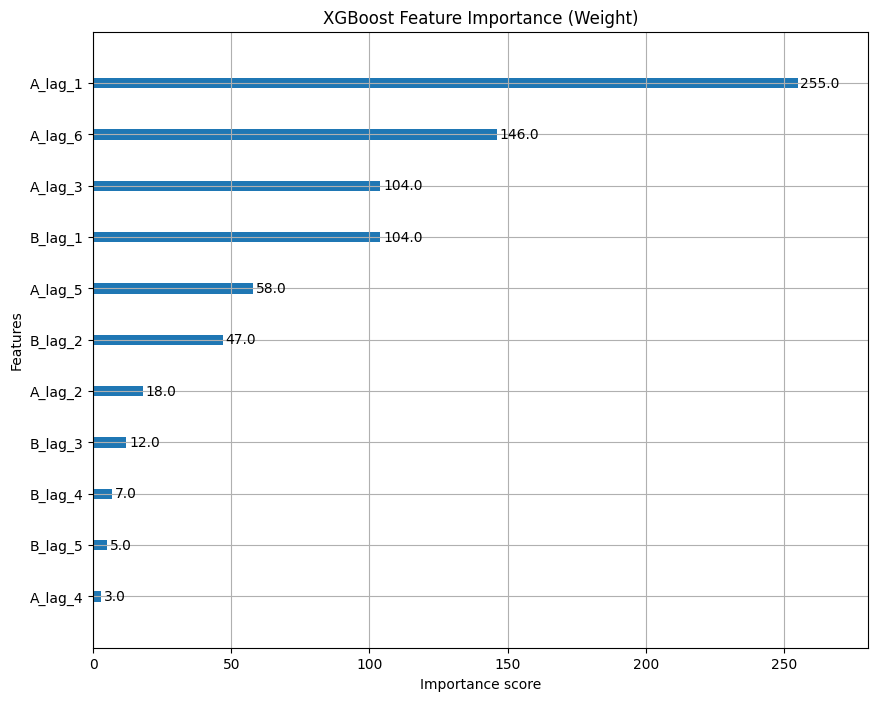

In [ ]:
import xgboost as xgb
import matplotlib.pyplot as plt

# ----------------------------------------------------
# 4단계: XGBoost 특징 중요도 분석
# ----------------------------------------------------

print("--- 4단계 (XGB): 특징 중요도(Feature Importance) 분석 ---")

# 1. matplotlib 폰트 설정 (Colab에서 한글이 깨지지 않도록)
# (이미 설정되어 있다면 생략 가능)
# !sudo apt-get install -y fonts-nanum
# !sudo fc-cache -fv
# !rm ~/.cache/matplotlib -rf
# plt.rc('font', family='NanumBarunGothic')

# 2. XGBoost 내장 함수로 특징 중요도 시각화
fig, ax = plt.subplots(figsize=(10, 8))
xgb.plot_importance(
    xgb_model,
    ax=ax,
    importance_type='weight', # 'weight': 특징이 사용된 횟수
    title='XGBoost Feature Importance (Weight)'
)
plt.show()

In [ ]:
from sklearn.model_selection import GridSearchCV
import xgboost as xgb
import numpy as np

# ----------------------------------------------------
# 5단계: XGBoost 하이퍼파라미터 튜닝 (GridSearchCV)
# ----------------------------------------------------
# 1. 훈련 데이터 (X_train, y_train)는 3단계에서 생성한 것을 그대로 사용합니다.
#    (A: 2807, B: 3813)
print("--- 5단계 (XGB): 하이퍼파라미터 튜닝 시작 ---")
print(f"훈련 데이터: {X_train.shape[0]}개 샘플, {X_train.shape[1]}개 특징")

# 2. 탐색할 하이퍼파라미터 그리드(Grid) 정의
# (주의: 탐색 범위를 넓게 잡으면 훈련 시간이 매우 오래 걸릴 수 있습니다.)
# (우선 간단하게 3가지 주요 파라미터만 튜닝해 봅니다.)
param_grid = {
    'n_estimators': [100, 500, 1000],        # 트리의 개수
    'learning_rate': [0.01, 0.05, 0.1],     # 학습률
    'max_depth': [3, 5, 7]                  # 트리의 최대 깊이
}

# 3. 기본 XGBoost 모델 (random_state는 고정)
base_xgb_model = xgb.XGBRegressor(
    objective='reg:squarederror',
    random_state=42
)

# 4. GridSearchCV 설정
#    cv=3: 데이터를 3개로 나누어 교차 검증 (시계열이므로 shuffle=False가 중요)
#    scoring='neg_mean_squared_error': RMSE와 유사한 MSE를 기준으로 점수 책정
grid_search = GridSearchCV(
    estimator=base_xgb_model,
    param_grid=param_grid,
    cv=3,
    scoring='neg_mean_squared_error',
    verbose=2,  # 훈련 과정을 자세히 출력
    n_jobs=-1   # 사용 가능한 모든 CPU 코어 사용
)

# 5. 튜닝 시작 (X_train, y_train 사용)
try:
    grid_search.fit(X_train, y_train)

    print("\n--- 튜닝 완료 ---")
    print(f"최고 점수 (Negative MSE): {grid_search.best_score_:.2f}")
    print("최적의 하이퍼파라미터 조합:")
    print(grid_search.best_params_)

    # ----------------------------------------------------
    # 6단계: 최종 모델로 2025년 8월 예측
    # ----------------------------------------------------

    # 1. 최적의 파라미터로 찾은 '최종 모델'
    final_xgb_model = grid_search.best_estimator_

    # 2. 예측에 사용할 X_forecast (3단계에서 생성한 2025-08 예측용 입력값)
    #    (A: 2807, Lag: 3 -> 2025-05-01 값)
    X_forecast = pd.DataFrame(X_forecast)

    # 3. 최종 예측
    final_prediction = final_xgb_model.predict(X_forecast)

    print(f"\n--- 📈 2025년 8월 [3813] 품목 총 무역량 예측 결과 (튜닝 완료) ---")
    print(f"예측 값: {final_prediction[0]:.2f}")

except Exception as e:
    print(f"\n--- ❗️ 튜닝 중 오류 발생 ---")
    print(f"오류: {e}")

--- 5단계 (XGB): 하이퍼파라미터 튜닝 시작 ---
훈련 데이터: 36개 샘플, 12개 특징
Fitting 3 folds for each of 27 candidates, totalling 81 fits

--- 튜닝 완료 ---
최고 점수 (Negative MSE): -256157276.99
최적의 하이퍼파라미터 조합:
{'learning_rate': 0.01, 'max_depth': 7, 'n_estimators': 100}

--- 📈 2025년 8월 [3813] 품목 총 무역량 예측 결과 (튜닝 완료) ---
예측 값: 2682.32


--- 1단계: 데이터 로드 및 시계열 구성 (요약) ---
df_ts (원본 시계열) 생성 완료.

--- 1단계 (XGB): 특징 공학 시작 ---
훈련 데이터 36개 생성 완료. (특징 개수: 12)

--- 2단계 (XGB): 모델 훈련 시작 (Test 5) ---
모델 훈련 완료.
참고: 2025년 7월 예측 RMSE: 4284.07 (실제값: 1709.0)

--- 3단계 (XGB): 2025년 8월 예측 시작 ---

--- 📈 2025년 8월 [7907] 품목 총 무역량 예측 결과 (XGBoost) ---
예측 값: 5911.25

--- 4단계 (XGB): 특징 중요도(Feature Importance) 분석 (Test 5) ---


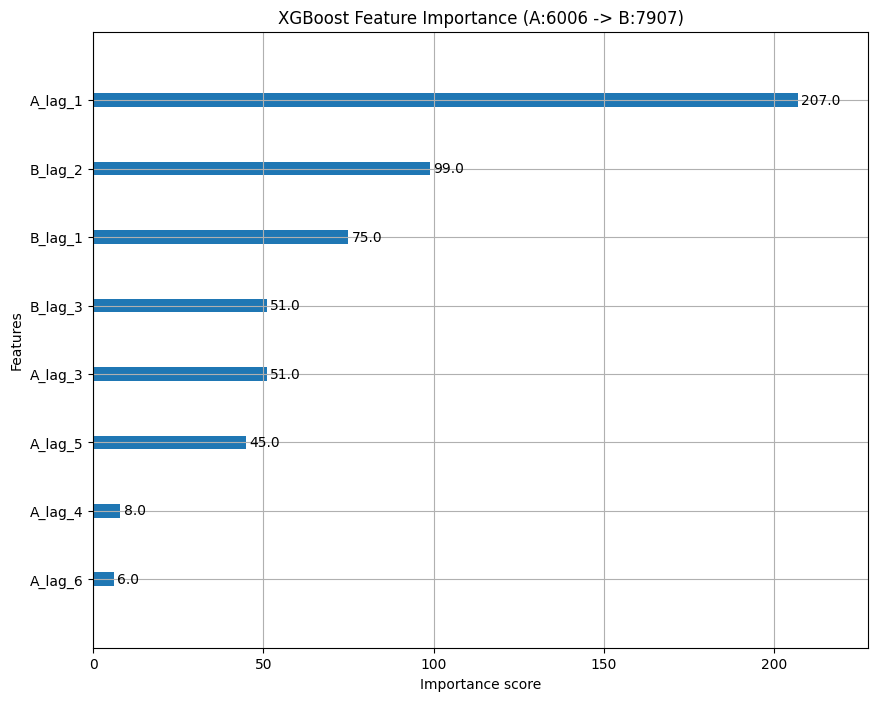

In [ ]:
import pandas as pd
import numpy as np
import xgboost as xgb
from sklearn.metrics import mean_squared_error
import matplotlib.pyplot as plt
import warnings

warnings.filterwarnings('ignore') # 경고 메시지 숨기기

# ----------------------------------------------------
# 0단계: 1단계 코드 요약 (df_ts가 메모리에 없다면 실행)
# ----------------------------------------------------
print("--- 1단계: 데이터 로드 및 시계열 구성 (요약) ---")

# (!) Colab에 파일을 업로드하고 경로를 수정하세요.
# 예: /content/train.csv
FILE_PATH = "/content/train.csv"

try:
    df = pd.read_csv(FILE_PATH)
except FileNotFoundError:
    print(f"오류: '{FILE_PATH}' 파일을 찾을 수 없습니다.")
    print("Colab 왼쪽의 '파일' 탭에 train.csv를 업로드한 후,")
    print("파일 경로를 (예: '/content/train.csv')로 수정하세요.")
    raise

df['date'] = pd.to_datetime(df['year'].astype(str) + '-' + df['month'].astype(str))
df_ts = df.pivot_table(
    index='date',
    columns='hs4',
    values='value',
    aggfunc='sum'
).fillna(0)
print("df_ts (원본 시계열) 생성 완료.")


# ----------------------------------------------------
# 1단계 (XGB): 특징 공학 (Feature Engineering)
# ----------------------------------------------------
print("\n--- 1단계 (XGB): 특징 공학 시작 ---")

# (Test 5) 새로운 Top 2 쌍
A = 6006
B = 7907

data = df_ts[[A, B]].copy()
data['y_target'] = data[B]
max_lag = 6

# 특징 (X) 생성
feature_columns = []
for lag in range(1, max_lag + 1):
    data[f'A_lag_{lag}'] = data[A].shift(lag)
    data[f'B_lag_{lag}'] = data[B].shift(lag)
    feature_columns.extend([f'A_lag_{lag}', f'B_lag_{lag}'])

# Lag 생성으로 인한 NaN 값 제거
data = data.dropna()

# 훈련/검증 데이터 분리
target_column = 'y_target'
train_data = data.iloc[:-1]
test_data = data.iloc[-1:]

X_train = train_data[feature_columns]
y_train = train_data[target_column]
X_test = test_data[feature_columns]
y_test = test_data[target_column]

print(f"훈련 데이터 {X_train.shape[0]}개 생성 완료. (특징 개수: {X_train.shape[1]})")

# ----------------------------------------------------
# 2단계 (XGB): 모델 훈련
# ----------------------------------------------------
print("\n--- 2단계 (XGB): 모델 훈련 시작 (Test 5) ---")

xgb_model_5 = xgb.XGBRegressor(
    objective='reg:squarederror',
    n_estimators=1000,
    learning_rate=0.01,
    early_stopping_rounds=50,
    random_state=42
)

# 모델 훈련
xgb_model_5.fit(
    X_train, y_train,
    eval_set=[(X_test, y_test)],
    verbose=False
)

print("모델 훈련 완료.")

# (참고) 2025년 7월 예측 성능 확인
test_pred = xgb_model_5.predict(X_test)
rmse = np.sqrt(mean_squared_error(y_test, test_pred))
print(f"참고: 2025년 7월 예측 RMSE: {rmse:.2f} (실제값: {y_test.iloc[0]})")


# ----------------------------------------------------
# 3단계 (XGB): 2025년 8월 최종 예측
# ----------------------------------------------------
print("\n--- 3단계 (XGB): 2025년 8월 예측 시작 ---")

# 1. 예측에 필요한 입력 데이터(X_forecast) 생성
last_data_point = data.iloc[-1]
forecast_input = {}
for lag in range(1, max_lag + 1):
    forecast_input[f'A_lag_{lag}'] = last_data_point['A_lag_1' if lag == 1 else f'A_lag_{lag-1}']
    forecast_input[f'B_lag_{lag}'] = last_data_point['y_target' if lag == 1 else f'B_lag_{lag-1}']

# 2025-07 A/B 값을 Lag 1로 업데이트
forecast_input['A_lag_1'] = last_data_point[A]
forecast_input['B_lag_1'] = last_data_point['y_target']

X_forecast = pd.DataFrame([forecast_input], columns=feature_columns)

# 2. 2025년 8월 예측
prediction = xgb_model_5.predict(X_forecast)

print(f"\n--- 📈 2025년 8월 [{B}] 품목 총 무역량 예측 결과 (XGBoost) ---")
print(f"예측 값: {prediction[0]:.2f}")


# ----------------------------------------------------
# 4단계: XGBoost 모델 분석 (Feature Importance)
# ----------------------------------------------------
print("\n--- 4단계 (XGB): 특징 중요도(Feature Importance) 분석 (Test 5) ---")

fig, ax = plt.subplots(figsize=(10, 8))
xgb.plot_importance(
    xgb_model_5,
    ax=ax,
    importance_type='weight',
    title=f'XGBoost Feature Importance (A:{A} -> B:{B})'
)
plt.show()

In [ ]:
from sklearn.model_selection import GridSearchCV
import xgboost as xgb
import numpy as np

# ----------------------------------------------------
# 5단계: XGBoost 하이퍼파라미터 튜닝 (Test 5: 6006 -> 7907)
# ----------------------------------------------------
# (이 코드는 4단계에서 생성된 X_train, y_train을 사용합니다)

print("--- 5단계 (XGB): 하이퍼파라미터 튜닝 시작 (A:6006 -> B:7907) ---")
print(f"훈련 데이터: {X_train.shape[0]}개 샘플, {X_train.shape[1]}개 특징")

# 2. 탐색할 하이퍼파라미터 그리드 정의
param_grid = {
    'n_estimators': [100, 500, 1000],        # 트리의 개수
    'learning_rate': [0.01, 0.05, 0.1],     # 학습률
    'max_depth': [3, 5, 7]                  # 트리의 최대 깊이
}

# 3. 기본 XGBoost 모델
base_xgb_model = xgb.XGBRegressor(
    objective='reg:squarederror',
    random_state=42
)

# 4. GridSearchCV 설정
#    cv=3: 데이터를 3개로 나누어 교차 검증
#    scoring='neg_mean_squared_error': MSE를 기준으로 점수 책정
grid_search = GridSearchCV(
    estimator=base_xgb_model,
    param_grid=param_grid,
    cv=3,
    scoring='neg_mean_squared_error',
    verbose=2,  # 훈련 과정을 자세히 출력
    n_jobs=-1   # Colab의 모든 코어 사용
)

# 5. 튜닝 시작 (이전 셀의 X_train, y_train 사용)
try:
    grid_search.fit(X_train, y_train)

    print("\n--- 튜닝 완료 ---")
    print(f"최고 점수 (Negative MSE): {grid_search.best_score_:.2f}")
    print("최적의 하이퍼파라미터 조합:")
    print(grid_search.best_params_)

    # ----------------------------------------------------
    # 6단계: 최종 모델로 2025년 8월 예측
    # ----------------------------------------------------

    # 1. 최적의 파라미터로 찾은 '최종 모델'
    final_xgb_model = grid_search.best_estimator_

    # 2. 예측에 사용할 X_forecast (이전 셀에서 생성한 2025-08 예측용 입력값)
    # X_forecast는 이미 DataFrame으로 준비되어 있습니다.

    # 3. 최종 예측
    final_prediction = final_xgb_model.predict(X_forecast)

    print(f"\n--- 📈 2025년 8월 [7907] 품목 총 무역량 예측 결과 (튜닝 완료) ---")
    print(f"예측 값: {final_prediction[0]:.2f}")

except Exception as e:
    print(f"\n--- ❗️ 튜닝 중 오류 발생 ---")
    print(f"오류: {e}")

--- 5단계 (XGB): 하이퍼파라미터 튜닝 시작 (A:6006 -> B:7907) ---
훈련 데이터: 36개 샘플, 12개 특징
Fitting 3 folds for each of 27 candidates, totalling 81 fits

--- 튜닝 완료 ---
최고 점수 (Negative MSE): -152165688.42
최적의 하이퍼파라미터 조합:
{'learning_rate': 0.01, 'max_depth': 7, 'n_estimators': 100}

--- 📈 2025년 8월 [7907] 품목 총 무역량 예측 결과 (튜닝 완료) ---
예측 값: 2763.47


In [ ]:
import pandas as pd

# 1. 제출용 샘플 파일 로드
# (Colab에 sample_submission.csv 파일을 업로드해야 합니다)
try:
    df_submission = pd.read_csv("sample_submission.csv")
    print("--- sample_submission.csv (상위 5줄) ---")
    print(df_submission.head())
except FileNotFoundError:
    print("오류: sample_submission.csv 파일을 찾을 수 없습니다.")
    print("Colab 왼쪽에 파일을 업로드한 후 다시 실행해 주세요.")

--- sample_submission.csv (상위 5줄) ---
  leading_item_id following_item_id      value
0        DEWLVASR          ELQGMQWE  999999999
1        DEWLVASR          AHMDUILJ  999999999
2        DEWLVASR          XIPPENFQ  999999999
3        DEWLVASR          FTSVTTSR  999999999
4        DEWLVASR          XMKRPGLB  999999999


In [ ]:
import pandas as pd
import numpy as np

# ----------------------------------------------------
# 1단계 (New): 'item_id' 기준 시계열 구성
# ----------------------------------------------------
print("--- 1단계 (New): 'item_id' 기준 피벗 테이블 생성 시작 ---")

# 1. 원본 데이터 로드 (df는 이미 메모리에 있다고 가정)
# (Colab 런타임이 재시작되었다면 1단계 코드를 다시 실행해야 합니다)
# FILE_PATH = "/content/train.csv"
# df = pd.read_csv(FILE_PATH)
# df['date'] = pd.to_datetime(df['year'].astype(str) + '-' + df['month'].astype(str))

# 2. (New) 'item_id'를 기준으로 'value' 합계 집계
df_ts_item = df.pivot_table(
    index='date',
    columns='item_id',
    values='value',
    aggfunc='sum'
)

# 3. 'NaN' 값을 0으로 채우기
df_ts_item = df_ts_item.fillna(0)

# 4. (New) 차분 데이터 생성
df_ts_diff_item = df_ts_item.diff().dropna()

print("--- 'item_id' 기준 df_ts_item 및 df_ts_diff_item 생성 완료 ---")
print(f"총 {len(df_ts_item.columns)}개의 고유 item_id가 분석 대상입니다.")

--- 1단계 (New): 'item_id' 기준 피벗 테이블 생성 시작 ---
--- 'item_id' 기준 df_ts_item 및 df_ts_diff_item 생성 완료 ---
총 100개의 고유 item_id가 분석 대상입니다.


In [ ]:
from statsmodels.tsa.stattools import ccf
import xgboost as xgb
from tqdm import tqdm # 진행률 표시

# ----------------------------------------------------
# 2단계 (New): XGBoost로 모든 제출 쌍 예측
# ----------------------------------------------------
print("\n--- 2단계 (New): 제출 파일 쌍 분석 및 예측 시작 ---")

# 1. 제출용 샘플 파일 로드
df_submission = pd.read_csv("sample_submission.csv")
predictions = [] # 예측 결과를 저장할 리스트
max_lag = 6 # XGBoost에 사용할 Lag 범위

# 2. tqdm을 사용하여 각 행(쌍)을 순회
for index, row in tqdm(df_submission.iterrows(), total=len(df_submission)):
    A_id = row['leading_item_id']
    B_id = row['following_item_id']

    # 3. A, B가 훈련 데이터(df_ts_item)에 있는지 확인
    if A_id not in df_ts_item or B_id not in df_ts_item:
        # 훈련 데이터에 없는 item_id면 0으로 예측
        predictions.append(0.0)
        continue

    # 4. (XGBoost) 특징 공학
    data = df_ts_item[[A_id, B_id]].copy()
    data['y_target'] = data[B_id]
    feature_columns = []

    for lag in range(1, max_lag + 1):
        data[f'A_lag_{lag}'] = data[A_id].shift(lag)
        data[f'B_lag_{lag}'] = data[B_id].shift(lag)
        feature_columns.extend([f'A_lag_{lag}', f'B_lag_{lag}'])

    data = data.dropna()

    # 5. 데이터가 너무 적으면(예: 12개월 미만) 학습 불가
    if len(data) < 12:
        # 데이터가 부족하면 B의 전체 평균으로 예측
        predictions.append(df_ts_item[B_id].mean())
        continue

    # 6. 훈련 데이터 준비
    X_train = data[feature_columns]
    y_train = data['y_target']

    # 7. XGBoost 훈련
    xgb_model = xgb.XGBRegressor(
        objective='reg:squarederror',
        n_estimators=100, # 튜닝 대신 기본값 사용 (속도)
        learning_rate=0.05,
        max_depth=3,
        random_state=42
    )
    xgb_model.fit(X_train, y_train, verbose=False)

    # 8. 2025년 8월 예측용 데이터(X_forecast) 생성
    last_data_point = data.iloc[-1]
    forecast_input = {}
    for lag in range(1, max_lag + 1):
        forecast_input[f'A_lag_{lag}'] = last_data_point['A_lag_1' if lag == 1 else f'A_lag_{lag-1}']
        forecast_input[f'B_lag_{lag}'] = last_data_point['y_target' if lag == 1 else f'B_lag_{lag-1}']

    forecast_input['A_lag_1'] = last_data_point[A_id]
    forecast_input['B_lag_1'] = last_data_point['y_target']
    X_forecast = pd.DataFrame([forecast_input], columns=feature_columns)

    # 9. 2025년 8월 예측 및 저장
    prediction = xgb_model.predict(X_forecast)
    predictions.append(prediction[0])

print("\n--- 예측 완료 ---")

# ----------------------------------------------------
# 3단계 (New): 제출 파일 생성
# ----------------------------------------------------

# 1. 예측 결과를 'value' 컬럼에 덮어쓰기
df_submission['value'] = predictions

# 2. 음수 예측값은 0으로 처리
df_submission['value'] = df_submission['value'].apply(lambda x: max(x, 0))

# 3. 제출 파일 저장
df_submission.to_csv("submission.csv", index=False)

print("\n--- 🏁 'submission.csv' 파일 생성 완료! ---")
print(df_submission.head())


--- 2단계 (New): 제출 파일 쌍 분석 및 예측 시작 ---


100%|██████████| 9900/9900 [08:13<00:00, 20.05it/s]



--- 예측 완료 ---

--- 🏁 'submission.csv' 파일 생성 완료! ---
  leading_item_id following_item_id         value
0        DEWLVASR          ELQGMQWE  4.736293e+05
1        DEWLVASR          AHMDUILJ  1.096372e+05
2        DEWLVASR          XIPPENFQ  1.254158e+05
3        DEWLVASR          FTSVTTSR  1.174673e+05
4        DEWLVASR          XMKRPGLB  1.355372e+06


In [ ]:
import pandas as pd
import numpy as np
import xgboost as xgb
from statsmodels.tsa.stattools import ccf
from tqdm import tqdm # 진행률 표시
import warnings

warnings.filterwarnings('ignore') # 경고 메시지 숨기기

# ----------------------------------------------------
# 1단계: 'item_id' 기준 시계열 구성
# ----------------------------------------------------
print("--- 1단계: 'item_id' 기준 시계열 구성 시작 ---")

# (!) Colab에 파일을 업로드하고 경로를 수정하세요.
# 예: /content/train.csv
FILE_PATH = "/content/train.csv"
try:
    df = pd.read_csv(FILE_PATH)
except FileNotFoundError:
    print(f"오류: '{FILE_PATH}' 파일을 찾을 수 없습니다.")
    raise

df['date'] = pd.to_datetime(df['year'].astype(str) + '-' + df['month'].astype(str))

# (New) 'item_id'를 기준으로 'value' 합계 집계
df_ts_item = df.pivot_table(
    index='date',
    columns='item_id',
    values='value',
    aggfunc='sum'
).fillna(0)

# (New) 차분 데이터 생성 (CCF 분석용)
df_ts_diff_item = df_ts_item.diff().dropna()

print(f"--- 'item_id' 기준 시계열 생성 완료 (총 {len(df_ts_item.columns)}개) ---")

# ----------------------------------------------------
# 2단계 (Final): CCF 필터 + XGBoost 예측
# ----------------------------------------------------
print("\n--- 2단계 (Final): 제출 파일 쌍 분석 및 예측 시작 ---")

# 1. 제출용 샘플 파일 로드
df_submission = pd.read_csv("sample_submission.csv")
predictions = [] # 예측 결과를 저장할 리스트

# 2. 하이퍼파라미터 설정
CORR_THRESHOLD = 0.3 # CCF 상관계수 기준 (F1 점수용)
MAX_LAG = 6 # XGBoost에 사용할 Lag 범위

# 3. tqdm을 사용하여 각 행(쌍)을 순회
for index, row in tqdm(df_submission.iterrows(), total=len(df_submission)):
    A_id = row['leading_item_id']
    B_id = row['following_item_id']

    # 4. A, B가 훈련 데이터(df_ts_item)에 있는지 확인
    if A_id not in df_ts_item or B_id not in df_ts_item:
        predictions.append(0.0)
        continue

    # 5. (필터링) CCF 분석
    # 차분된 데이터로 CCF 계산
    series_A_diff = df_ts_diff_item[A_id]
    series_B_diff = df_ts_diff_item[B_id]

    # Lag 1~5의 상관계수 계산
    correlations = ccf(series_A_diff, series_B_diff, adjusted=False, nlags=MAX_LAG)
    # Lag 0 (동행)은 제외하고, Lag 1~5의 최대 상관계수(절대값) 확인
    max_corr = np.max(np.abs(correlations[1:MAX_LAG]))

    # 6. (선별) 상관계수가 기준(Threshold) 미만이면 0으로 예측
    if max_corr < CORR_THRESHOLD:
        predictions.append(0.0)
        continue

    # 7. (예측) 상관계수가 기준 이상이면 XGBoost 훈련
    data = df_ts_item[[A_id, B_id]].copy()
    data['y_target'] = data[B_id]
    feature_columns = []

    for lag in range(1, MAX_LAG + 1):
        data[f'A_lag_{lag}'] = data[A_id].shift(lag)
        data[f'B_lag_{lag}'] = data[B_id].shift(lag)
        feature_columns.extend([f'A_lag_{lag}', f'B_lag_{lag}'])

    data = data.dropna()

    if len(data) < 12:
        predictions.append(df_ts_item[B_id].mean()) # 데이터 부족 시 평균값
        continue

    X_train = data[feature_columns]
    y_train = data['y_target']

    xgb_model = xgb.XGBRegressor(
        objective='reg:squarederror',
        n_estimators=100,
        learning_rate=0.05,
        max_depth=3,
        random_state=42
    )
    xgb_model.fit(X_train, y_train, verbose=False)

    # 8. 2025년 8월 예측용 데이터(X_forecast) 생성
    last_data_point = data.iloc[-1]
    forecast_input = {}
    for lag in range(1, MAX_LAG + 1):
        forecast_input[f'A_lag_{lag}'] = last_data_point['A_lag_1' if lag == 1 else f'A_lag_{lag-1}']
        forecast_input[f'B_lag_{lag}'] = last_data_point['y_target' if lag == 1 else f'B_lag_{lag-1}']

    forecast_input['A_lag_1'] = last_data_point[A_id]
    forecast_input['B_lag_1'] = last_data_point['y_target']
    X_forecast = pd.DataFrame([forecast_input], columns=feature_columns)

    # 9. 2025년 8월 예측 및 저장
    prediction = xgb_model.predict(X_forecast)
    predictions.append(prediction[0])

print("\n--- 예측 완료 ---")

# ----------------------------------------------------
# 3단계 (Final): 제출 파일 생성
# ----------------------------------------------------

# 1. 예측 결과를 'value' 컬럼에 덮어쓰기
df_submission['value'] = predictions

# 2. 평가 산식에 따라 음수 예측값은 0으로, 정수로 반올림
df_submission['value'] = df_submission['value'].apply(lambda x: max(x, 0)).round().astype(int)

# 3. 제출 파일 저장
df_submission.to_csv("submission2.csv", index=False)

print("\n--- 🏁 'submission.csv' 파일 생성 완료! ---")
print("CCF 필터링으로 인해 0으로 예측된 쌍의 개수:")
print(f"{(df_submission['value'] == 0).sum()} / {len(df_submission)}")
print(df_submission.head())

--- 1단계: 'item_id' 기준 시계열 구성 시작 ---
--- 'item_id' 기준 시계열 생성 완료 (총 100개) ---

--- 2단계 (Final): 제출 파일 쌍 분석 및 예측 시작 ---


100%|██████████| 9900/9900 [02:39<00:00, 61.95it/s] 


--- 예측 완료 ---

--- 🏁 'submission.csv' 파일 생성 완료! ---
CCF 필터링으로 인해 0으로 예측된 쌍의 개수:
6937 / 9900
  leading_item_id following_item_id    value
0        DEWLVASR          ELQGMQWE        0
1        DEWLVASR          AHMDUILJ        0
2        DEWLVASR          XIPPENFQ        0
3        DEWLVASR          FTSVTTSR   117467
4        DEWLVASR          XMKRPGLB  1355372


In [ ]:
#CCF 0.25 + XGBoost max_depth 5)
import pandas as pd
import numpy as np
import xgboost as xgb
from statsmodels.tsa.stattools import ccf
from tqdm import tqdm # 진행률 표시
import warnings

warnings.filterwarnings('ignore') # 경고 메시지 숨기기

# ----------------------------------------------------
# 1단계: 'item_id' 기준 시계열 구성
# ----------------------------------------------------
print("--- 1단계: 'item_id' 기준 시계열 구성 시작 ---")

# (df_ts_item, df_ts_diff_item이 메모리에 없다면 1단계 코드를 다시 실행)
# FILE_PATH = "/content/train.csv"
# df = pd.read_csv(FILE_PATH)
# df['date'] = pd.to_datetime(df['year'].astype(str) + '-' + df['month'].astype(str))
# df_ts_item = df.pivot_table(index='date', columns='item_id', values='value', aggfunc='sum').fillna(0)
# df_ts_diff_item = df_ts_item.diff().dropna()
# print("--- 'item_id' 기준 시계열 생성 완료 ---")

# ----------------------------------------------------
# 2단계 (수정본): CCF 0.25 필터 + XGBoost (max_depth 5)
# ----------------------------------------------------
print("\n--- 2단계 (수정본): 제출 파일 쌍 분석 및 예측 시작 ---")

# 1. 제출용 샘플 파일 로드
df_submission = pd.read_csv("sample_submission.csv")
predictions = []

# 2. (수정) 하이퍼파라미터 설정
CORR_THRESHOLD = 0.25 # (수정) 0.3 -> 0.25 (더 많은 쌍 포함)
MAX_LAG = 6

# 3. tqdm을 사용하여 각 행(쌍)을 순회
for index, row in tqdm(df_submission.iterrows(), total=len(df_submission)):
    A_id = row['leading_item_id']
    B_id = row['following_item_id']

    if A_id not in df_ts_item or B_id not in df_ts_item:
        predictions.append(0.0)
        continue

    # 5. (필터링) CCF 분석
    series_A_diff = df_ts_diff_item[A_id]
    series_B_diff = df_ts_diff_item[B_id]

    correlations = ccf(series_A_diff, series_B_diff, adjusted=False, nlags=MAX_LAG)
    max_corr = np.max(np.abs(correlations[1:MAX_LAG]))

    # 6. (선별) 상관계수가 0.25 미만이면 0으로 예측
    if max_corr < CORR_THRESHOLD:
        predictions.append(0.0)
        continue

    # 7. (예측) XGBoost 훈련
    data = df_ts_item[[A_id, B_id]].copy()
    data['y_target'] = data[B_id]
    feature_columns = []

    for lag in range(1, MAX_LAG + 1):
        data[f'A_lag_{lag}'] = data[A_id].shift(lag)
        data[f'B_lag_{lag}'] = data[B_id].shift(lag)
        feature_columns.extend([f'A_lag_{lag}', f'B_lag_{lag}'])

    data = data.dropna()

    if len(data) < 12:
        predictions.append(df_ts_item[B_id].mean())
        continue

    X_train = data[feature_columns]
    y_train = data['y_target']

    # (수정) XGBoost 모델 (max_depth=5)
    xgb_model = xgb.XGBRegressor(
        objective='reg:squarederror',
        n_estimators=100,
        learning_rate=0.05,
        max_depth=5,  # (수정) 3 -> 5 (더 정교한 학습)
        random_state=42
    )
    xgb_model.fit(X_train, y_train, verbose=False)

    # 8. 2025년 8월 예측용 데이터(X_forecast) 생성
    last_data_point = data.iloc[-1]
    forecast_input = {}
    for lag in range(1, MAX_LAG + 1):
        forecast_input[f'A_lag_{lag}'] = last_data_point['A_lag_1' if lag == 1 else f'A_lag_{lag-1}']
        forecast_input[f'B_lag_{lag}'] = last_data_point['y_target' if lag == 1 else f'B_lag_{lag-1}']

    forecast_input['A_lag_1'] = last_data_point[A_id]
    forecast_input['B_lag_1'] = last_data_point['y_target']
    X_forecast = pd.DataFrame([forecast_input], columns=feature_columns)

    # 9. 2025년 8월 예측 및 저장
    prediction = xgb_model.predict(X_forecast)
    predictions.append(prediction[0])

print("\n--- 예측 완료 ---")

# ----------------------------------------------------
# 3단계 (Final): 제출 파일 생성
# ----------------------------------------------------

# 1. 예측 결과를 'value' 컬럼에 덮어쓰기
df_submission['value'] = predictions

# 2. 평가 산식에 따라 음수 예측값은 0으로, 정수로 반올림
df_submission['value'] = df_submission['value'].apply(lambda x: max(x, 0)).round().astype(int)

# 3. 제출 파일 저장
df_submission.to_csv("submission_v2.csv", index=False)

print("\n--- 🏁 'submission_v2.csv' 파일 생성 완료! ---")
print(f"CCF > {CORR_THRESHOLD} 기준으로 0이 아닌 값을 예측한 쌍의 개수:")
print(f"{(df_submission['value'] > 0).sum()} / {len(df_submission)}")
print(df_submission.head())

--- 1단계: 'item_id' 기준 시계열 구성 시작 ---

--- 2단계 (수정본): 제출 파일 쌍 분석 및 예측 시작 ---


100%|██████████| 9900/9900 [04:58<00:00, 33.19it/s]



--- 예측 완료 ---

--- 🏁 'submission_v2.csv' 파일 생성 완료! ---
CCF > 0.25 기준으로 0이 아닌 값을 예측한 쌍의 개수:
4469 / 9900
  leading_item_id following_item_id    value
0        DEWLVASR          ELQGMQWE        0
1        DEWLVASR          AHMDUILJ        0
2        DEWLVASR          XIPPENFQ        0
3        DEWLVASR          FTSVTTSR   129491
4        DEWLVASR          XMKRPGLB  1670447


In [3]:
import pandas as pd

df3=pd.read_csv('/content/submission_v2.csv')
df4=df3[df3['value'] != 0]
df4.head()

,leading_item_id,following_item_id,value
3,DEWLVASR,FTSVTTSR,129491
4,DEWLVASR,XMKRPGLB,1670447
6,DEWLVASR,SUOYXCHP,10177
7,DEWLVASR,ZKENOUDA,354904
10,DEWLVASR,DDEXPPXU,13459


In [4]:
df4.to_csv('submission_v3.csv', index=False, encoding='utf-8-sig')


--- ARIMAX 모델 파라미터 자동 탐색 시작 ---

--- 최적 모델 요약 ---
                               SARIMAX Results                                
Dep. Variable:                      y   No. Observations:                   40
Model:                        SARIMAX   Log Likelihood                -435.422
Date:                Fri, 14 Nov 2025   AIC                            874.845
Time:                        04:11:26   BIC                            878.222
Sample:                    03-01-2022   HQIC                           876.066
                         - 06-01-2025                                         
Covariance Type:                  opg                                         
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
intercept   4911.9500   6864.711      0.716      0.474   -8542.637    1.84e+04
sigma2       1.67e+08   3.22e+07      5.188      0.000    1.04e+08     2.3e+08
Lj